In [ ]:
import torch
from torchtext import data
from torchtext import datasets

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [ ]:
import pandas as pd 
from torchtext.vocab import Vectors
from torch.nn import init
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/train.csv")
data.head()

In [ ]:
original = data["original"].tolist()

In [ ]:
edit = data["edit"].tolist()

In [ ]:
print(len(edit))

9652


In [ ]:
import re

In [ ]:
print(original[:10])

['France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq', 'Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?', 'Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/> ', 'In an apparent first , Iran and Israel <engage/> each other militarily', 'Trump was told weeks ago that Flynn misled <Vice/> President .', 'All 22 <promises/> Trump made in his speech to Congress , in one chart', 'New DOJ alert system will flag <crimes/> against police', "As Someone Who Grew Up Among Fundamentalist <Christians/> In The US , I 'm Surprised Anyone 's Surprised About Roy Moore", "Canadians may pay more taxes than Americans , but here 's what they get for their <money/> ", 'Dutch minister resigns in drug baron <row/> ']


In [ ]:
pat = "<.*>"
after_edit = []
for i in range(len(edit)):
  after_edit.append(re.sub(pat,edit[i],original[i]))
data["after_edit"] = after_edit
data.head()

,id,original,edit,grades,meanGrade,after_edit
0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2,France is ‘ hunting down its citizens who join...
1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6,"Pentagon claims 2,000 % increase in Russian tr..."
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0,Iceland PM Calls Snap Vote as Pedophile Furor ...
3,76,"In an apparent first , Iran and Israel <engage...",slap,20000,0.4,"In an apparent first , Iran and Israel slap ea..."
4,6164,Trump was told weeks ago that Flynn misled <Vi...,school,0,0.0,Trump was told weeks ago that Flynn misled sch...


In [ ]:
data.to_csv("train_data_1.csv")

In [ ]:
import pandas as pd 

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/project_zzy/train_data_1.csv")
train_data.head()

,Unnamed: 0,id,original,edit,grades,meanGrade,after_edit
0,0,14530,France is ‘ hunting down its citizens who join...,twins,10000,0.2,France is ‘ hunting down its citizens who join...
1,1,13034,"Pentagon claims 2,000 % increase in Russian tr...",bowling,33110,1.6,"Pentagon claims 2,000 % increase in Russian tr..."
2,2,8731,Iceland PM Calls Snap Vote as Pedophile Furor ...,party,22100,1.0,Iceland PM Calls Snap Vote as Pedophile Furor ...
3,3,76,"In an apparent first , Iran and Israel <engage...",slap,20000,0.4,"In an apparent first , Iran and Israel slap ea..."
4,4,6164,Trump was told weeks ago that Flynn misled <Vi...,school,0,0.0,Trump was told weeks ago that Flynn misled sch...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data['original']

0       France is ‘ hunting down its citizens who join...
1       Pentagon claims 2,000 % increase in Russian tr...
2       Iceland PM Calls Snap Vote as Pedophile Furor ...
3       In an apparent first , Iran and Israel <engage...
4       Trump was told weeks ago that Flynn misled <Vi...
                              ...                        
9647    State officials blast ' unprecedented ' DHS <m...
9648    Protesters Rally for <Refugees/> Detained at J...
9649    Cruise line Carnival Corp. joins the fight aga...
9650    Columbia police hunt woman seen with <gun/> ne...
9651    Here 's What 's In The House-Approved Health <...
Name: original, Length: 9652, dtype: object

In [ ]:
humortest = pd.read_csv('/content/testForhumor.csv')

In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.util import mark_negation
from nltk.corpus import sentiwordnet as swn
import numpy as np

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def text_score(text):

    postive_count = 0 
    negtive_count = 0 
    subjective_count = 0 
    #create单词表
    #nltk.pos_tag是打标签
    wordlist = nltk.pos_tag(text)
    # word_tag_fq = nltk.FreqDist(ttt)
    # wordlist = word_tag_fq.most_common()

    #变为dataframe形式
    key = []
    part = []
    for i in range(len(wordlist)):
        key.append(wordlist[i][0])
        part.append(wordlist[i][1])
    textdf = pd.DataFrame({'key':key,
                      'part':part},
                      columns=['key','part'])

    #编码
    n = ['NN','NNP','NNPS','NNS','UH']
    v = ['VB','VBD','VBG','VBN','VBP','VBZ']
    a = ['JJ','JJR','JJS']
    r = ['RB','RBR','RBS','RP','WRB']

    for i in range(len(textdf['key'])):
        z = textdf.iloc[i,1]

        if z in n:
            textdf.iloc[i,1]='n'
        elif z in v:
            textdf.iloc[i,1]='v'
        elif z in a:
            textdf.iloc[i,1]='a'
        elif z in r:
            textdf.iloc[i,1]='r'
        else:
            textdf.iloc[i,1]=''
            
        #计算单个评论的单词分数
    score = []
    for i in range(len(textdf['key'])):
        m = list(swn.senti_synsets(textdf.iloc[i,0],textdf.iloc[i,1]))
        s = 0
        ra = 0
        if len(m) > 0:
            for j in range(len(m)):
                s += m[j].pos_score()-m[j].neg_score()
            if s > 0:
              postive_count = postive_count + 1
            elif s < 0:
              negtive_count = negtive_count + 1
            else:
              subjective_count = subjective_count + 1
        else:
            subjective_count = subjective_count + 1
    All_v = postive_count + negtive_count + subjective_count
            
    return postive_count/All_v, negtive_count/All_v, subjective_count/All_v





def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def process_text(text):
  punc_removed = [word for word in text if word not in string.punctuation]
  punc_removed = ''.join(punc_removed)
  punc_removed = word_tokenize(punc_removed)
  pos_tagged = nltk.pos_tag(punc_removed)
  vocabularies = []
  for token, tag in pos_tagged:
      pos = get_wordnet_pos(tag) or wordnet.NOUN
      lemmatizer = WordNetLemmatizer()
      token = lemmatizer.lemmatize(token, pos)
      if (token.lower() not in stopwords.words('english')):
          vocabularies.append(token.lower())
  postive_count,negtive_count,subjective_count = text_score(vocabularies)

  return vocabularies, postive_count, negtive_count, subjective_count

In [ ]:
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
humortest['text'] = humortest['vab'].apply(process_text)
humortest[['edi_vab','postive_count','negtive_count','subjective_count']] = humortest['text'].apply(pd.Series)
humortest.drop(['vab','text'],axis=1,inplace=True)
humortest.head()

,Unnamed: 0,edi_vab,postive_count,negtive_count,subjective_count
0,0,"[france, ‘, hunt, citizen, join, ’, without, t...",0.000000,0.1,0.900000
1,1,"[apparent, first, iran, israel, militarily, pa...",0.000000,0.0,1.000000
2,2,"[trump, tell, week, ago, flynn, mislead, presi...",0.000000,0.0,1.000000
3,3,"[canadian, may, pay, tax, american, get, mouth...",0.142857,0.0,0.857143
4,4,"[dutch, minister, resigns, drug, baron, waddle]",0.166667,0.0,0.833333


In [ ]:
# train_data['ori_vab'] = train_data['original'].apply(process_text)

train_data['text'] = train_data['after_edit'].apply(process_text)
train_data[['edi_vab','postive_count','negtive_count','subjective_count']] = train_data['text'].apply(pd.Series)

train_data.drop(['original','after_edit','text'],axis=1,inplace=True)
train_data.head()

,Unnamed: 0,id,edit,grades,meanGrade,edi_vab,postive_count,negtive_count,subjective_count
0,0,14530,twins,10000,0.2,"[france, ‘, hunt, citizen, join, twin, ’, with...",0.100000,0.100000,0.800000
1,1,13034,bowling,33110,1.6,"[pentagon, claim, 2000, increase, russian, tro...",0.111111,0.222222,0.666667
2,2,8731,party,22100,1.0,"[iceland, pm, calls, snap, vote, pedophile, fu...",0.333333,0.000000,0.666667
3,3,76,slap,20000,0.4,"[apparent, first, iran, israel, slap, militarily]",0.000000,0.000000,1.000000
4,4,6164,school,0,0.0,"[trump, tell, week, ago, flynn, mislead, schoo...",0.000000,0.000000,1.000000


In [ ]:
globe_path = "/content/drive/My Drive/glove/glove.6B.300d.txt"
def load_word_embeddings(file=globe_path):
    embeddings={}
    with open(file,'r') as infile:
        for line in infile:
            values=line.split()
            embeddings[values[0]]=np.asarray(values[1:],dtype='float32')
    return embeddings

In [ ]:
embeddings = load_word_embeddings()
len(embeddings.keys())

400000

In [ ]:
def sentence_2_vector(vab, embeddings=embeddings,emb_size=300):
    words=[w for w in vab if w.isalpha() and w in embeddings]
    if len(words)==0:
        return np.hstack([np.zeros(emb_size)])
    M=np.array([embeddings[w] for w in words])
    max,min = find_maxcos_and_mincos(M)
    return np.append(M.mean(axis=0),np.array([max,min]))

def find_maxcos_and_mincos(M):
    max = -5
    min = 5
    for i in range(M.shape[0]):
      for j in range(i+1 , M.shape[0]):
        vector1 = M[i];
        vector2 = M[j];
        temp = np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2)))
        if temp > max:
          max = temp
        if temp < min:
          min = temp
      return max,min

In [ ]:
edit_train = np.array([sentence_2_vector(x) for x in train_data['edi_vab'].values.tolist()])
# ori_train = np.array([sentence_2_vector(x) for x in train_data['ori_vab'].values.tolist()])
edit_train.shape

(9652, 302)

In [ ]:
edit_train = np.array([sentence_2_vector(x) for x in train_data['edi_vab'].values.tolist()])
# ori_train = np.array([sentence_2_vector(x) for x in train_data['ori_vab'].values.tolist()])
edit_train.shape

(9652, 302)

In [ ]:
train_data['is_humor'] = train_data['meanGrade'].apply(lambda x : 1 if x > 1.5 else 0)

In [ ]:
another_data = humortest[['postive_count','negtive_count','subjective_count']]
another_data.head()

NameError: ignored

In [ ]:
another_data = train_data[['postive_count','negtive_count','subjective_count','is_humor']]
another_data.head()

,postive_count,negtive_count,subjective_count,is_humor
0,0.100000,0.100000,0.800000,0
1,0.111111,0.222222,0.666667,1
2,0.333333,0.000000,0.666667,0
3,0.000000,0.000000,1.000000,0
4,0.000000,0.000000,1.000000,0


In [ ]:
another_data.values.tolist()
another_data = np.array(another_data.values.tolist())
another_data.shape

(9652, 4)

In [ ]:
all_data = np.append(edit_train,another_data,axis=1)
all_data.shape


(9652, 306)

In [ ]:
np.save("preprocessed_data.npy",all_data)

In [ ]:
X_train = all_data[:,:-1]
X_train

array([[-0.09562676,  0.12027788,  0.02145988, ...,  0.1       ,
         0.1       ,  0.8       ],
       [-0.04961512,  0.40499023,  0.02239013, ...,  0.11111111,
         0.22222222,  0.66666667],
       [ 0.12004679, -0.09314055, -0.03396578, ...,  0.33333333,
         0.        ,  0.66666667],
       ...,
       [ 0.2142002 , -0.07271703, -0.00600445, ...,  0.        ,
         0.5       ,  0.5       ],
       [-0.20017782,  0.0013544 , -0.0593844 , ...,  0.1       ,
         0.1       ,  0.8       ],
       [ 0.03635333,  0.124628  , -0.04373967, ...,  0.25      ,
         0.25      ,  0.5       ]])

In [ ]:
y_train = all_data[:,-1]
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
train_x, x_test, train_y, y_test = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
import xgboost as xgb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_logloss(model):
    results = model.evals_result_
    print(results)
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, 100)
    print(epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    print(results['validation_1']['logloss'])
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGDboost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification error')
    plt.title('XGBoostClassification error')
    plt.show()

In [ ]:
params = {"min_child_weight": 50, "eta": 0.05, "max_depth": 8,
            "subsample": 0.8, "silent" : 1, "nthread": 4,
            "eval_metric": "logloss", "objective": "binary:logistic"}

In [ ]:
model1=xgb.XGBClassifier(**params)
train = [train_x, train_y]
eval = [x_test, y_test]
model2=model1.fit(train_x,train_y,early_stopping_rounds=40,eval_metric=['logloss','auc','error'],eval_set=[train,eval])

[0]	validation_0-logloss:0.650728	validation_0-auc:0.655125	validation_0-error:0.174718	validation_1-logloss:0.654315	validation_1-auc:0.530958	validation_1-error:0.185914
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.615563	validation_0-auc:0.700645	validation_0-error:0.174718	validation_1-logloss:0.622598	validation_1-auc:0.550946	validation_1-error:0.185914
[2]	validation_0-logloss:0.586476	validation_0-auc:0.719566	validation_0-error:0.174718	validation_1-logloss:0.595743	validation_1-auc:0.573602	validation_1-error:0.185914
[3]	validation_0-logloss:0.562136	validation_0-auc:0.735467	validation_0-error:0.174718	validation_1-logloss:0.573879	validation_1-auc:0.591222	validation_1-error:0.185914
[4]	validation_0-logloss:0.541457	validation_0-auc:0.746123	validation_0-error:0.174718	validation_1-logloss:0.555621	validation_1-auc:0.599397	validat

{'validation_0': {'logloss': [0.650728, 0.615563, 0.586476, 0.562136, 0.541457, 0.523873, 0.508763, 0.495289, 0.483835, 0.473764, 0.464967, 0.457447, 0.450778, 0.444776, 0.439566, 0.435167, 0.430854, 0.426825, 0.423277, 0.42003, 0.416797, 0.413906, 0.411213, 0.409116, 0.4069, 0.404896, 0.402978, 0.401097, 0.399126, 0.397224, 0.395506, 0.393811, 0.392024, 0.390511, 0.388835, 0.387205, 0.385364, 0.383633, 0.382036, 0.380515, 0.379352, 0.377905, 0.376369, 0.374665, 0.373256, 0.371751, 0.370526, 0.369299, 0.367381, 0.365962, 0.36446, 0.362923, 0.3615, 0.360044, 0.358582, 0.35745, 0.355995, 0.354566, 0.353561, 0.352473, 0.351189, 0.350179, 0.349012, 0.347765, 0.346572, 0.345364, 0.344282, 0.342921, 0.341977, 0.340552, 0.339328, 0.338547, 0.337484, 0.336486, 0.33528, 0.334103, 0.333082, 0.331949, 0.330779, 0.329718, 0.328484, 0.327346, 0.326118, 0.324936, 0.323648, 0.322566, 0.321576, 0.320315, 0.31937, 0.318246, 0.317052, 0.315989, 0.314831, 0.313751, 0.31272, 0.311462, 0.310389, 0.30932, 0

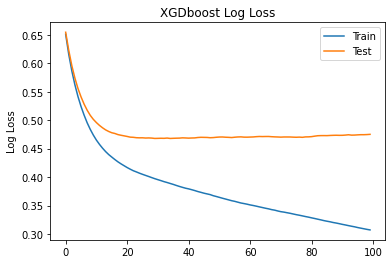

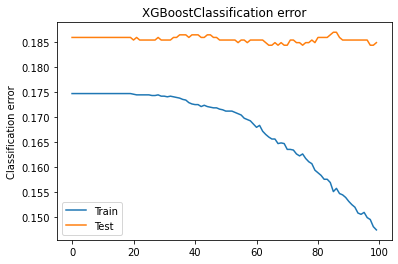

In [ ]:
plot_logloss(model2)

In [ ]:
xgb_pars = {"min_child_weight": 50, "eta": 0.05, "max_depth": 8,
            "subsample": 0.8, "silent" : 1, "nthread": 4,
            "eval_metric": "logloss", "objective": "binary:logistic"}

d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_test, label=y_test)
d_test = xgb.DMatrix(X_test)
watchlist = [(d_train, 'train'), (d_val, 'valid')]

bst = xgb.train(xgb_pars, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=50)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


NameError: ignored

In [ ]:
ans = model2.predict(all_data)

In [ ]:
sum(ans)

6.0

In [ ]:
ans = bst.predict(d_test )
for i in range(len(ans)):
  if ans[i] > 0.5:
    ans[i] = 1
  else:
    ans[i] = 0

In [ ]:
print((len(ans)-sum(abs(ans - y_test)))/len(ans))

0.8208182288969446
